ZAD 1



In [1]:
import tensorflow as tf

In [2]:
x = tf.Variable(4.0)
y = tf.Variable(3.0)

with tf.GradientTape() as tape:
    f = (x**3)+(y**2)                        
    df_dx,df_dy = tape.gradient(f,(x,y))

print(df_dx.numpy())
print(df_dy.numpy())

48.0
6.0


ZAD 2

In [ ]:
x = tf.Variable(1.0)
y = tf.Variable(2.0)

with tf.GradientTape() as tape:
    f = 4*(x**3)+11*(y**2)+9*y*x+10                         
    df_dx,df_dy = tape.gradient(f,(x,y))

print(df_dx.numpy())
print(df_dy.numpy())

Zad 3

In [81]:
import matplotlib.pyplot as plt 
import numpy as np

In [82]:
number_of_points = 1000
x_point = []
y_point = []

In [84]:
a = -0.22
b = 0.78

In [85]:
for i in range(number_of_points):
    x = np.random.normal(0.0,0.5)
    y = (a*x+b)+np.random.normal(0.0,0.1)
    x_point.append(x)
    y_point.append(y)

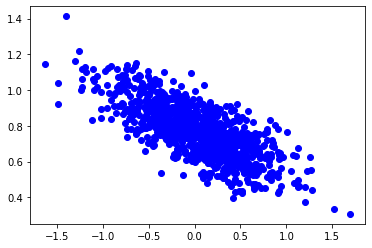

In [86]:
plt.scatter(x_point,y_point,c='b')
plt.show()

In [87]:
real_x = np.array(x_point)
real_y = np.array(y_point)

In [88]:
def loss_fn(real_y, pred_y):
    return tf.reduce_mean((real_y - pred_y)**2)

In [89]:
import random
a = tf.Variable(random.random())
b = tf.Variable(random.random())

In [90]:
Loss = []
epochs = 1000
learning_rate = 0.01

for _ in range(epochs):
  with tf.GradientTape() as tape:
    pred_y = a * real_x + b
    loss = loss_fn(real_y, pred_y)
    Loss.append(loss.numpy())

  dloss_da, dloss_db = tape.gradient(loss,(a, b))

  a.assign_sub(learning_rate*dloss_da)  #a = a - alpha*dloss_da
  b.assign_sub(learning_rate*dloss_db)  #b = b - alpha*dloss_db

In [91]:
np.max(Loss),np.min(Loss)

(0.028574357, 0.0098474445)

In [92]:
print(a.numpy())
print(b.numpy())

-0.22509728
0.77586883


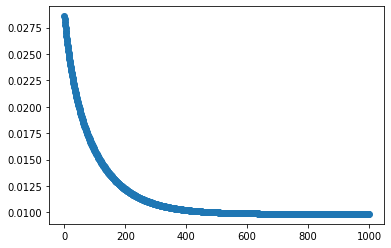

In [93]:
plt.scatter(np.arange(epochs),Loss)
plt.show()

In [94]:
max = np.max(x_point)
min = np.min(x_point)

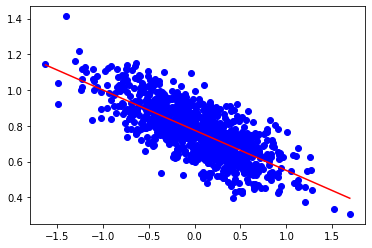

In [95]:
X = np.linspace(min, max, num=10)
plt.plot(X,a.numpy()*X+b.numpy(),c='r')
plt.scatter(x_point,y_point,c="b")
plt.show()

In [96]:
def subset_dataset(x_dataset, y_dataset, subset_size):
    arr = np.arange(len(x_dataset))
    np.random.shuffle(arr) 
    x_train = x_dataset[arr[0:subset_size]]
    y_train = y_dataset[arr[0:subset_size]]
    return x_train,y_train

In [129]:
a = tf.Variable(random.random())
b = tf.Variable(random.random())

In [130]:
Loss = []
epochs = 1000
learning_rate = 0.2
batch_size = 50

for i in range(epochs):
  real_x_batch,real_y_batch = subset_dataset(real_x,real_y,batch_size)
  with tf.GradientTape() as tape:
    pred_y = a * real_x_batch + b
    loss = loss_fn(real_y_batch, pred_y)
    Loss.append(loss.numpy())

  dloss_da, dloss_db = tape.gradient(loss,(a, b))

  a.assign_sub(learning_rate*dloss_da)  #a = a - alpha*dloss_da
  b.assign_sub(learning_rate*dloss_db)  #b = b - alpha*dloss_db

In [131]:
np.max(Loss),np.min(Loss)

(0.0836345, 0.0046261256)

In [132]:
print(a.numpy())
print(b.numpy())

-0.21703197
0.77252394


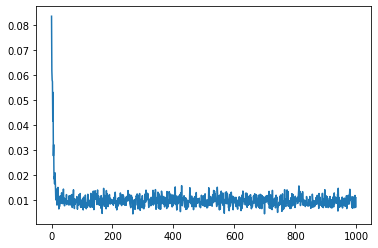

In [133]:
plt.plot(Loss)
plt.show()